In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placementcsv/placement.csv


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
dataset = pd.read_csv("/kaggle/input/placementcsv/placement.csv")
dataset

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


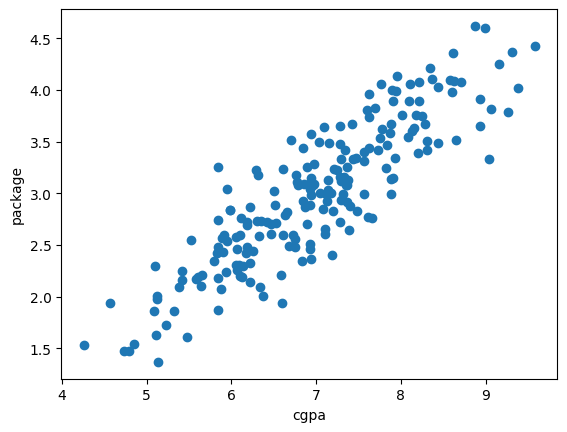

In [4]:
plt.scatter(dataset["cgpa"],dataset["package"])
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()

In [5]:
dataset.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


In [6]:
x = dataset[["cgpa"]]
y = dataset["package"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pf.transform(x)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


LinearRegression()

In [12]:
model.fit(x_train,y_train)


LinearRegression()

In [13]:
model.score(x_test,y_test)

0.7488560625124441

In [14]:
test = pf.transform([[5.12]])
test

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.      ,   5.12    ,  26.2144  , 134.217728]])

In [15]:
pred = model.predict(test)
pred

array([1.90237682])

In [16]:
y_pred = model.predict(x)

In [17]:
model.coef_

array([ 0.        , -0.95646685,  0.23972319, -0.01219163])

In [18]:
model.intercept_

2.1516198337140215

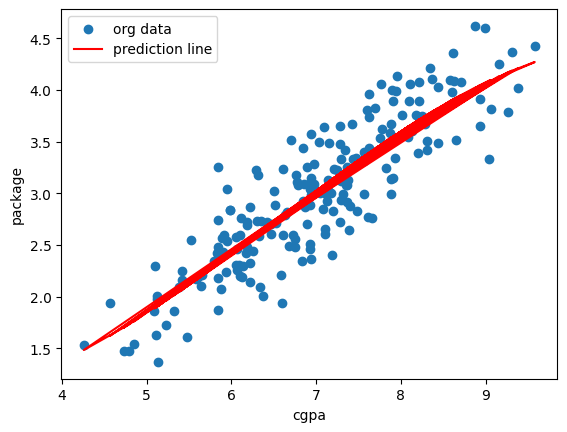

In [19]:
plt.scatter(dataset["cgpa"],dataset["package"])
plt.plot(dataset["cgpa"],y_pred,c='red')
plt.xlabel("cgpa")
plt.ylabel("package")
plt.legend(["org data","prediction line"])
plt.show()